# **CUSTOMER CHURN PREDICTION FOR SYRIATEL**

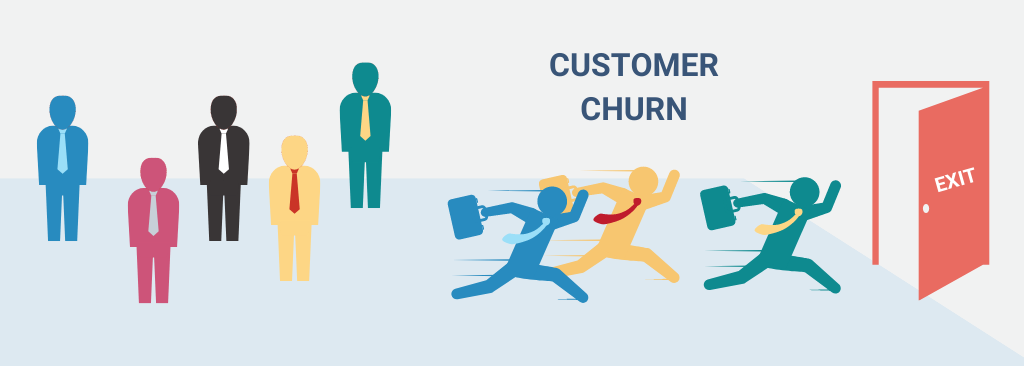

In [1]:
#import library to display image
from IPython.display import Image, display
display(Image(filename='images/customer churn image.png'))

# By : Jane Wanjiku Njuguna
***

# **1.Business Understanding**

## 1.1 Overview

### Problem Statement

#### SyriaTel, a telecommunications company, is facing a challenge with customers switching to competitors, resulting in revenue loss. The company seeks to tackle the issue of revenue loss by creating a model to predict customer churn. By analyzing the customer data, it will help the company gain insights and take action ,ultimately reducing the churn rate and improving business performance.

### Objectives


* #### Developing a model with an reccall score of 0.8
* ####  An accuracy score of 0.8
* #### Providing recommendations to the company for reducing churn rate.

#  **2. Data Understanding**

## 2.1 Load the dataset

### The following dataset (SyriaTel telecom dataset) is typically available in online data science and machine learning platform (Kaggle). It is frequently used in projects focused on predicting customer churn and contains anonymized records of customer information.

In [2]:
# Data Analysis
import pandas as pd
import numpy as np

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# File Downloading
from IPython.display import FileLink

# Statistical Analysis
from scipy import stats
from statsmodels.tools.tools import add_constant

# Preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Data Splitting & Resampling
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_predict, cross_val_score

# Handling Imbalanced Data
from imblearn.over_sampling import SMOTE

# Modeling
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Evaluation Metrics
from sklearn.metrics import (
    classification_report, precision_score, recall_score, accuracy_score, f1_score, 
    roc_curve, roc_auc_score, precision_recall_curve, confusion_matrix, ConfusionMatrixDisplay
)

# Miscellaneous
from sklearn.base import BaseEstimator, clone
from sklearn import preprocessing

Load the data file

In [3]:
#checking the records in the dataset
data = pd.read_csv('data/churn analysis.csv')
data

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


In [4]:
#dataset info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

# Categorical Features:

**state:** The state where the customer lives.

**phone number:** The customer's phone number.

**international plan:** Does the customer have an international plan?(Yes or No).

**voice mail plan:** Whether the customer has a voice mail plan (Yes or No).

# Numeric Features:

**area code:** The area code associated with the customer's phone number.

**account length:** The number of days the customer has been an account holder.

**number vmail messages:** The number of voice mail messages received by the customer.

**total day minutes:** The total number of minutes the customer used during the day.

**total day calls:** The total number of calls made by the customer during the day.

**total day charge:** The total charges paid by the customer for daytime usage.

**total eve minutes:** The total number of minutes the customer used during the evening.

**total eve calls:** The total number of calls made by the customer during the evening.

**total eve charge:** The total charges paid by the customer for evening usage.

**total night minutes:** The total number of minutes the customer used during the night.

**total night calls:** The total number of calls made by the customer during the night.

**total night charge:** The total charges paid by the customer for nighttime usage.

**total intl minutes:** The total number of international minutes used by the customer.

**total intl calls:** The total number of international calls made by the customer.

**total intl charge:** The total charges incurred by the customer for international usage.

**customer service calls:** The number of customer service calls made by the customer.

In [5]:
#shape of the dataframe
shape = data.shape
print(f'The dataframe has {shape[0]} rows.')
print(f'The dataframe has {shape[1]} columns.')

The dataframe has 3333 rows.
The dataframe has 21 columns.


In [6]:
#summary statistic of numerical columns
data.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


**1.Customer Tenure:** Customers stay with the company for an average of 101 months which is indicated by the account length column, but some are very new, and others have been around.

**2.Day_time Calls :** On average, customers spend 179 minutes on daytime calls.

**3.Evening Calls:** People tend to make more calls in the evening, averaging 201 minutes more than the daytime calls.

**4.International Calls:** Very few customers make international calls, and those who do, keep it brief, averaging just 10 minutes.

# 3. DATA PREPARATION

## 3.1 Data Cleaning

In [7]:
#Dropping irrelevant columns
#Dropping the 'phone number' column
data = data.drop('phone number', axis = 1)
data

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,no,yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,no,no,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,no,no,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,yes,no,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


Dropping the phone number column from the dataset is appropriate because a person's phone number does not influence whether they churn or not.

In [8]:
data.isnull().sum()

state                     0
account length            0
area code                 0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

There are no missing values

In [9]:

# Mapping of state abbreviations to full state names
state_in_full = {
    'WV': 'West Virginia',
    'MN': 'Minnesota',
    'NY': 'New York',
    'AL': 'Alabama',
    'WI': 'Wisconsin',
    'OH': 'Ohio',
    'OR': 'Oregon',
    'WY': 'Wyoming',
    'VA': 'Virginia',
    'CT': 'Connecticut',
    'MI': 'Michigan',
    'ID': 'Idaho',
    'VT': 'Vermont',
    'TX': 'Texas',
    'UT': 'Utah',
    'IN': 'Indiana',
    'MD': 'Maryland',
    'KS': 'Kansas',
    'NC': 'North Carolina',
    'NJ': 'New Jersey',
    'MT': 'Montana',
    'CO': 'Colorado',
    'NV': 'Nevada',
    'WA': 'Washington',
    'RI': 'Rhode Island',
    'MA': 'Massachusetts',
    'MS': 'Mississippi',
    'AZ': 'Arizona',
    'FL': 'Florida',
    'MO': 'Missouri',
    'NM': 'New Mexico',
    'ME': 'Maine',
    'ND': 'North Dakota',
    'NE': 'Nebraska',
    'OK': 'Oklahoma',
    'DE': 'Delaware',
    'SC': 'South Carolina',
    'SD': 'South Dakota',
    'KY': 'Kentucky',
    'IL': 'Illinois',
    'NH': 'New Hampshire',
    'AR': 'Arkansas',
    'GA': 'Georgia',
    'DC': 'District of Columbia',
    'HI': 'Hawaii',
    'TN': 'Tennessee',
    'AK': 'Alaska',
    'LA': 'Louisiana',
    'PA': 'Pennsylvania',
    'IA': 'Iowa',
    'CA': 'California'
}

# state abbreviations with full names in the dataset
data['state'] = data['state'].replace(state_in_full)

# Checking for the changes
print(data[['state']].head())

        state
0      Kansas
1        Ohio
2  New Jersey
3        Ohio
4    Oklahoma


# 4. Data Analysis

## 4.1 Univariate Analysis

### Previewing the target variable column of whether it is imbalanced or not which is our class column whether a customer churns or not.

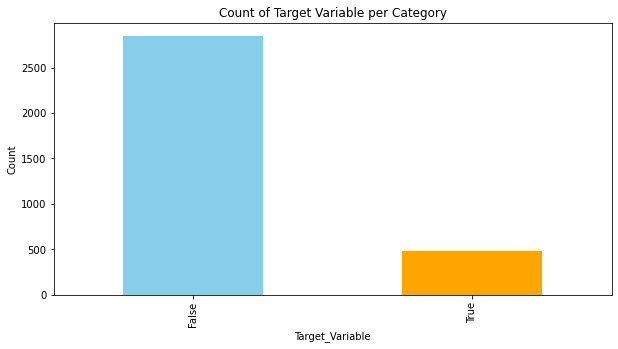

In [10]:
#plot value_counts for the churn column
churn_counts = data['churn'].value_counts() 
churn_counts.plot(kind = 'bar' , figsize = (10,5), color = ['skyblue' , 'orange'])
#Add plot labels and title
plt.xlabel('Target_Variable')
plt.ylabel('Count')
plt.title('Count of Target Variable per Category')
plt.savefig('target_imbalance.png',dpi=300, bbox_inches='tight')
#show the plot
plt.show();

In [11]:
print('Raw counts : \n')
#print the value_counts for the churn column
print(data['churn'].value_counts())
print('..........................')
#print the proportion of each category in the churn column
print(data['churn'].value_counts(normalize = True))

Raw counts : 

False    2850
True      483
Name: churn, dtype: int64
..........................
False    0.855086
True     0.144914
Name: churn, dtype: float64


**Insight**
 * The data is highly imbalanced
 * Most customers stay with the company (85.5%), while only a small group (14.5%) leave. This difference means we need to ensure the model can still focus on predicting those who leave.We are interested in the True class and its 14% and has less data.

### 2. Distribution of categorical features

In [12]:
#distribution of categorical features
def categorical_features(data, feature):
    
    #Ploting the distribution of a categorical feature in the given data.
    
    plt.figure(figsize=(10, 5))
    sns.countplot(x=feature, data=data, color='pink', order=data[feature].value_counts().index)
    plt.xticks(rotation=90)
    plt.title(f"Distribution of {feature}", fontsize=16)
    plt.show()
    

*  1. International Plan

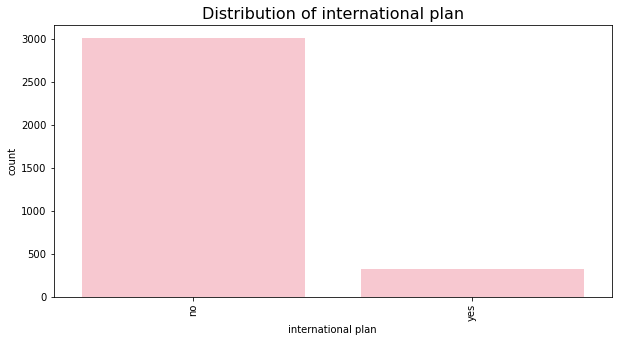

In [13]:
categorical_features(data, 'international plan')

* Insight
  
Majority of the customers didnt have international plan this may lead to biasness.

* 2. Voice mail plan

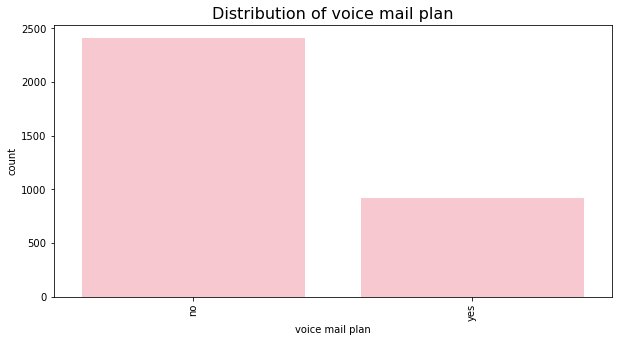

In [14]:
categorical_features(data, 'voice mail plan')

* Insight

Majority of the customers didnt have voice mail plan this may lead to to biased data.

* State

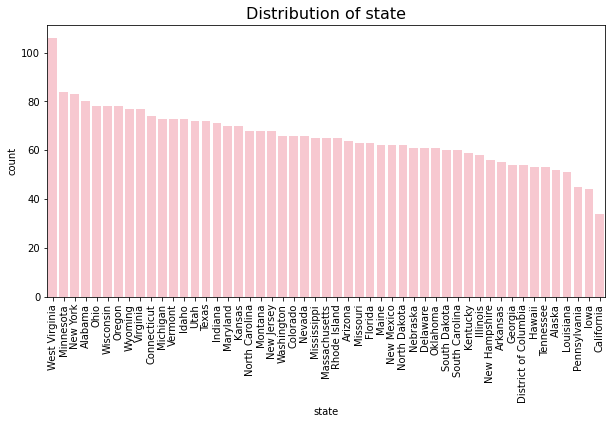

In [15]:
categorical_features(data, 'state')

The state are more or less equally the same and this may result to droppping of the column since there is no much to check technically its not providing much information

## 4.2 Bivariate Analysis

####  Relationship between categorical variables(voice mail plan,international plan and state) and the churn rate

In [16]:
#Checking the distribution of categorical features based on churn rate
def plot_categorical_distribution_on_churn_rate(df, feature):

   # Plots the distribution of a categorical feature in the given data.
    
    plt.figure(figsize=(10, 4))
    churn_counts = df.groupby(feature)["churn"].sum().sort_values(ascending=False)
    top_10_categories = churn_counts.head(10).index.tolist()
    sns.countplot(x=feature, hue="churn", data=df, order=top_10_categories ,palette= ["#66CDAA", "#4682B4"])
    plt.xticks(rotation=90)
    plt.legend(loc="upper right")
    plt.title(f"Distribution of '{feature}' Based on Churn Rate", fontsize=16)
    plt.show()

#####  a. Area Code

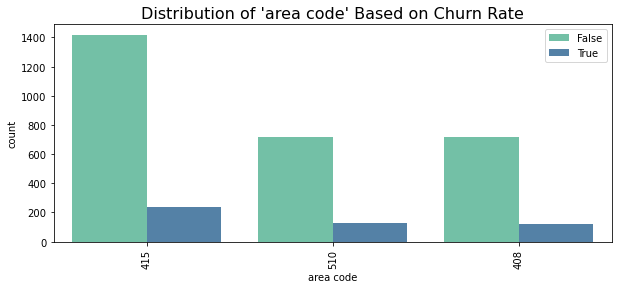

In [17]:
plot_categorical_distribution_on_churn_rate(data, 'area code')

**Insight**

* Of the customers who have terminated their account, most of them are from area codes 415 and 510.More people are from area code 415 and this may lead to biased data.

##### b. International plan

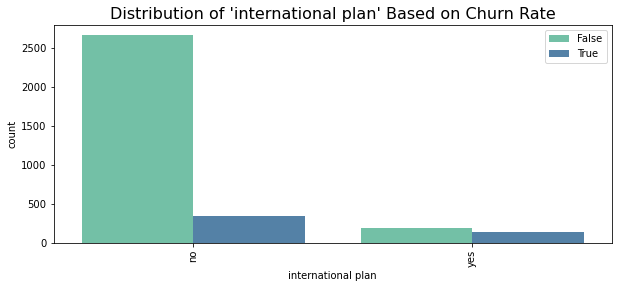

In [18]:
plot_categorical_distribution_on_churn_rate(data, 'international plan')

**Insight** 

* Customers with an international plan are less likely to churn.

# Convert 'area code' to categorical since it's categorical in meaning


In [19]:
data['area code'] = data['area code'].astype('category')

## Numerical Features

In [20]:
data_num = data.select_dtypes(exclude=['bool_', 'object_','category'])
data_num

,account length,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
0,128,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,107,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,137,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,84,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,75,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2
3329,68,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3
3330,28,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2
3331,184,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2


### Analyzing the distribution of the data to determine whether it follows a normal distribution or exhibits skewness.

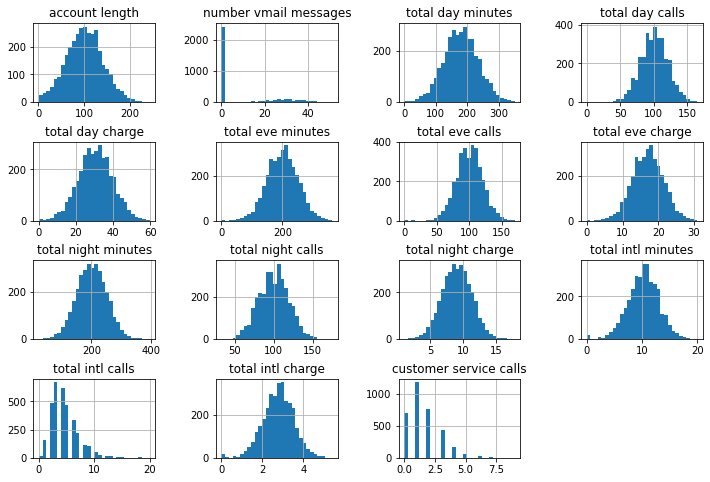

In [21]:
#plotting the numerical values
data.select_dtypes(include=['number']).hist(figsize=(12, 8), bins=30)
plt.subplots_adjust(hspace=0.5, wspace=0.5)
plt.show()

The features customer service calls and number of voicemail messages are right-skewed, meaning most values are low, with a few higher ones creating a tail on the right. However, they do not show any noticeable bias.

##### b. Customer service calls

In [22]:
def visualize_churn_relationship(data, feature, title, ylabel):
    #visualize the churn relationshikp
    plt.figure(figsize=(10, 6))
    sns.barplot(x='churn', y=feature, data=data, estimator=np.mean, palette='coolwarm',hue = 'churn')
    plt.title(title)
    plt.xlabel('Churn')
    plt.ylabel(ylabel)
    plt.show()

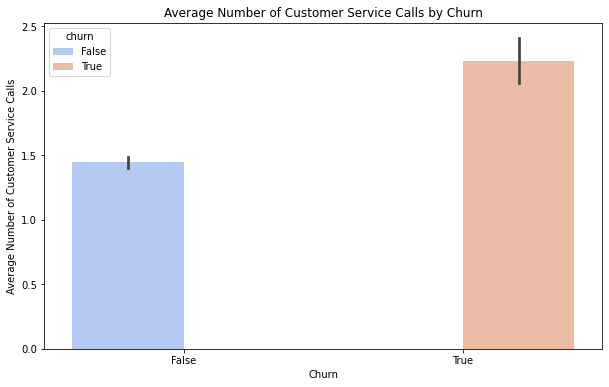

In [23]:
visualize_churn_relationship(
    data = data,
    feature='customer service calls',
    title='Average Number of Customer Service Calls by Churn',
    ylabel='Average Number of Customer Service Calls',
)

**Insight:**

* On average, customers who churned tend to make more customer service calls, which could suggest that they experienced issues that led to them leaving the service. This could be important for retention strategies, as addressing customer concerns may reduce churn.


More people are from area code 415 and this may bring biasness.
Distribution of churn is also imbalanced this may bring biasness.
The state are more or less equally the same and this may result to droppping of the column since there is no much to check technically its not providing much information.
Majority of the customers didnt have international plan this may lead to biasness.
Majority of the customers didnt have voice mail plan this may lead to to biasness.
All these needs to be handled due to imbalanced dataset.

## Multicollinearity Check

In [24]:
#absolute values of correlations 
corr_abs = data_num.corr().abs()
#Removes duplicates and keeps only one side
sort = (corr_abs.where(np.triu(np.ones(corr_abs.shape), k=1).astype(bool)))
#makes a list and sorts the values
sort = sort.stack().sort_values(ascending=False)
sort

total day minutes      total day charge       1.000000
total eve minutes      total eve charge       1.000000
total night minutes    total night charge     0.999999
total intl minutes     total intl charge      0.999993
account length         total day calls        0.038470
                                                ...   
total eve calls        total night minutes    0.002093
                       total night charge     0.002056
number vmail messages  total day minutes      0.000778
                       total day charge       0.000776
total night calls      total intl calls       0.000305
Length: 105, dtype: float64

Since the charge increases as the minutes increase, the two variables are correlated. Therefore, the first four charge-related columns are redundant and should be dropped.

In [25]:
data.drop(['total day charge' , 'total eve charge' , 'total night charge'
           ,'total intl charge'], axis = 1 , inplace = True)  
      

In [26]:
data

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total eve minutes,total eve calls,total night minutes,total night calls,total intl minutes,total intl calls,customer service calls,churn
0,Kansas,128,415,no,yes,25,265.1,110,197.4,99,244.7,91,10.0,3,1,False
1,Ohio,107,415,no,yes,26,161.6,123,195.5,103,254.4,103,13.7,3,1,False
2,New Jersey,137,415,no,no,0,243.4,114,121.2,110,162.6,104,12.2,5,0,False
3,Ohio,84,408,yes,no,0,299.4,71,61.9,88,196.9,89,6.6,7,2,False
4,Oklahoma,75,415,yes,no,0,166.7,113,148.3,122,186.9,121,10.1,3,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,Arizona,192,415,no,yes,36,156.2,77,215.5,126,279.1,83,9.9,6,2,False
3329,West Virginia,68,415,no,no,0,231.1,57,153.4,55,191.3,123,9.6,4,3,False
3330,Rhode Island,28,510,no,no,0,180.8,109,288.8,58,191.9,91,14.1,6,2,False
3331,Connecticut,184,510,yes,no,0,213.8,105,159.6,84,139.2,137,5.0,10,2,False


## Data Preprocessing

### Converting the Categorical Columns to Numerical Columns

In [27]:
data.dtypes

state                       object
account length               int64
area code                 category
international plan          object
voice mail plan             object
number vmail messages        int64
total day minutes          float64
total day calls              int64
total eve minutes          float64
total eve calls              int64
total night minutes        float64
total night calls            int64
total intl minutes         float64
total intl calls             int64
customer service calls       int64
churn                         bool
dtype: object

In [28]:


# List of categorical columns to encode
categorical_columns = ['state', 'international plan', 'area code', 'voice mail plan']

# Apply label encoding to each column separately
for col in categorical_columns:
    # Create a new LabelEncoder for each column
    encoder = preprocessing.LabelEncoder()  
    data[col] = encoder.fit_transform(data[col])


In [29]:
#Rechecking the data types
print (data.dtypes)

state                       int32
account length              int64
area code                   int64
international plan          int32
voice mail plan             int32
number vmail messages       int64
total day minutes         float64
total day calls             int64
total eve minutes         float64
total eve calls             int64
total night minutes       float64
total night calls           int64
total intl minutes        float64
total intl calls            int64
customer service calls      int64
churn                        bool
dtype: object


## Splitting the data into X and y variables

In [30]:
#splitting the dataset into y and x variables
y = data['churn']
y.size

3333

In [31]:
#converting the y column into numerical value
y = y.replace({False : 0 , True : 1})

In [32]:
#lets prepare the features
X = data.drop('churn', axis =1)

In [33]:
X

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total eve minutes,total eve calls,total night minutes,total night calls,total intl minutes,total intl calls,customer service calls
0,16,128,1,0,1,25,265.1,110,197.4,99,244.7,91,10.0,3,1
1,35,107,1,0,1,26,161.6,123,195.5,103,254.4,103,13.7,3,1
2,30,137,1,0,0,0,243.4,114,121.2,110,162.6,104,12.2,5,0
3,35,84,0,1,0,0,299.4,71,61.9,88,196.9,89,6.6,7,2
4,36,75,1,1,0,0,166.7,113,148.3,122,186.9,121,10.1,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,2,192,1,0,1,36,156.2,77,215.5,126,279.1,83,9.9,6,2
3329,48,68,1,0,0,0,231.1,57,153.4,55,191.3,123,9.6,4,3
3330,39,28,2,0,0,0,180.8,109,288.8,58,191.9,91,14.1,6,2
3331,6,184,2,1,0,0,213.8,105,159.6,84,139.2,137,5.0,10,2


### Splitting the dataset

In [34]:
from sklearn.model_selection import train_test_split
#splitting the dataset
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25, 
                                                random_state = 42)

In [35]:
from sklearn.preprocessing import StandardScaler
#scaling the data
scaler = StandardScaler()
#scaling the training data
X_train = scaler.fit_transform(X_train) 
X_test = scaler.transform(X_test)

### Handling class imbalance using stratified k-fold

In [36]:

# List of classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(max_iter=500, solver='liblinear',random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine": SVC(),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

# Function for cross-validation
def evaluate_model(classifier, X_train, y_train, n_splits=10):
    skfold = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
    accuracy_scores = []
    
    for train_index, test_index in skfold.split(X_train, y_train):
        clone_clf = clone(classifier)
        
        X_train_folds = X_train[train_index]
        y_train_folds = y_train.iloc[train_index]
        X_test_fold = X_train[test_index]
        y_test_fold = y_train.iloc[test_index]

        clone_clf.fit(X_train_folds, y_train_folds)
        y_pred = clone_clf.predict(X_test_fold)
        
        accuracy = accuracy_score(y_test_fold, y_pred)
        accuracy_scores.append(accuracy)
    
    avg_accuracy = sum(accuracy_scores) / len(accuracy_scores)
    print(f"{classifier.__class__.__name__} Average Accuracy: {avg_accuracy:.4f}")

# Running all models
for name, clf in classifiers.items():
    print(f"Evaluating {name}...")
    evaluate_model(clf, X_train, y_train)
    print("-" * 50)

Evaluating Logistic Regression...
LogisticRegression Average Accuracy: 0.8603
--------------------------------------------------
Evaluating Decision Tree...
DecisionTreeClassifier Average Accuracy: 0.9092
--------------------------------------------------
Evaluating Random Forest...
RandomForestClassifier Average Accuracy: 0.9412
--------------------------------------------------
Evaluating K-Nearest Neighbors...
KNeighborsClassifier Average Accuracy: 0.8856
--------------------------------------------------
Evaluating Support Vector Machine...
SVC Average Accuracy: 0.9016
--------------------------------------------------
Evaluating Gradient Boosting...
GradientBoostingClassifier Average Accuracy: 0.9532
--------------------------------------------------


Gradient Boosting becomes the best performing baseline model
Is that the correct model though?

In [37]:

class NoChurn(BaseEstimator):
        def fit(self, X_train, y_train = None):
            pass
        def predict(self,X):
            return np.zeros((len(X), 1), dtype = bool)
No_Churn = NoChurn() 
cross_val_score(No_Churn,X_train,y_train, cv = 10, scoring = 'accuracy')

array([0.868     , 0.848     , 0.836     , 0.872     , 0.848     ,
       0.884     , 0.864     , 0.868     , 0.852     , 0.82730924])

The dummy model improves accuracy by only 7%, which is not good for business. This happens because only accuracy is considered. The classification metrics need to be examined to determine the most appropriate one to use.

### Evaluating the model on Training Data

In [38]:


# Choose the best classifier from above 
clf = classifiers["Gradient Boosting"]  

# cross-validated predictions
y_pred = cross_val_predict(clf, X_train, y_train, cv=10)

# Compute confusion matrix
cm = confusion_matrix(y_train, y_pred)

# Display confusion matrix
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[2123   18]
 [  96  262]]


TRUE negatives = 2123

18 were wrongly classified as no churn false positives

96 were churn but were classified as not churned(false negatives)

261 were churn and my code correctly classifies as churned


In this case, predicting that a customer will churn when they actually won’t is not a major issue for the business. However, predicting that a customer will not churn when they actually do can negatively impact the business.
## Hence in our case recall is more important



In [39]:
from sklearn.metrics import precision_score,recall_score
print('The prediction for precision:', precision_score(y_train,y_pred))
print('The prediction for recall:', recall_score(y_train,y_pred))      

The prediction for precision: 0.9357142857142857
The prediction for recall: 0.7318435754189944


The precision score is about 93% but the recall is 73% which is something we are concerened about.Further adjustments need to be done

## Checking the threshold of our decision boundary

In [40]:


# Gradient Boosting Classifier
clf = classifiers["Gradient Boosting"]

# predicted probabilities for the positive class (class 1)
y_scores = cross_val_predict(clf, X_train, y_train, cv=10, method="predict_proba")[:, 1]

# precision-recall curve
precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)

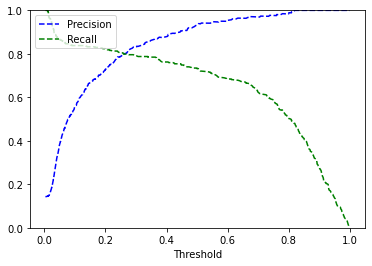

In [41]:
def plot_precision_recall_vs_threshold(precisions,recalls,thresholds):
    plt.plot(thresholds,precisions[:-1], 'b--',label = 'Precision')
    plt.plot(thresholds,recalls[:-1], 'g--',label = 'Recall')
    plt.xlabel('Threshold')
    plt.legend(loc = 'upper left')
    plt.ylim([0,1])
plot_precision_recall_vs_threshold(precisions,recalls,thresholds)
plt.show()

To adjust the trade-off between precision and recall, you need to choose a new decision threshold. The model uses the default threshold of 0.25.Increasing it to maximize recall.

In [42]:
#using a new threshold
y_new_scores = (y_scores > 0.25)
print("The new precision is:", precision_score(y_train,y_new_scores))
print("The new recall is:", recall_score(y_train,y_new_scores))

The new precision is: 0.7890410958904109
The new recall is: 0.8044692737430168


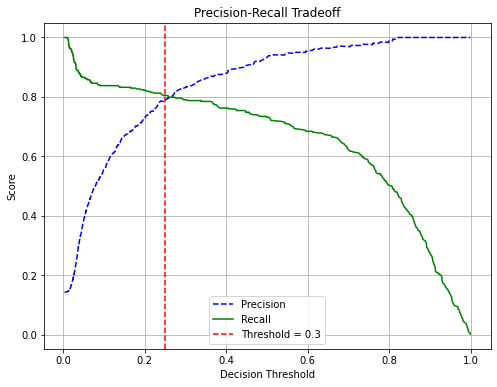

In [43]:


# Compute precision-recall curve
precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)

# Plot Precision-Recall Curve
plt.figure(figsize=(8, 6))
#precision curve
plt.plot(thresholds, precisions[:-1], "b--", label="Precision") 
#recall curve
plt.plot(thresholds, recalls[:-1], "g-", label="Recall") 
#threshold mark
plt.axvline(x=0.25, color='red', linestyle="--", label="Threshold = 0.3")  
plt.xlabel("Decision Threshold")
plt.ylabel("Score")
plt.title("Precision-Recall Tradeoff")
plt.legend()
plt.grid()
plt.show();

So by changing the the classifiers threshold we can change the precision
and recall depending on the demand of the business requirement.
Here we are able to improve the recall depending on the business requirement
Say if we want to improve churn these offers when we thought would churn but in re
lity would not)
But that way at least we can stop the actual churn

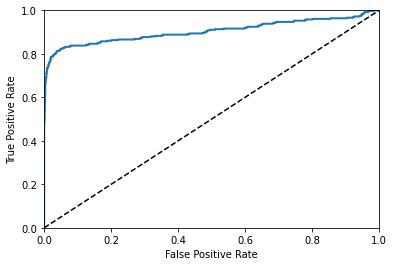

In [44]:

fpr,tpr, thresholds = roc_curve(y_train,y_scores)
def plot_roc_curve(fpr,tpr,label = None):
    plt.plot(fpr,tpr,linewidth = 2, label = label)
    plt.plot([0,1], [0,1], 'k--')
    plt.axis([0,1,0,1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
plot_roc_curve(fpr, tpr, label = 'Model ROC Curve')
plt.show()


## Evaluation On the Test Results

In [45]:
# Dictionary to store test results
test_results = {}

# Iterate over each classifier
for name, clf in classifiers.items():
    print(f"Testing {name} on unseen data...")

    # Train the classifier on full training data
    clf.fit(X_train, y_train)

    #  predictions on the test set
    y_test_pred = clf.predict(X_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred)
    recall = recall_score(y_test, y_test_pred)
    f1 = f1_score(y_test, y_test_pred)

    # Store the results
    test_results[name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1
    }

    # Print evaluation report
    print(f"Results for {name}:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print("-" * 50)


Testing Logistic Regression on unseen data...
Results for Logistic Regression:
Accuracy: 0.8573
Precision: 0.5789
Recall: 0.1760
F1-Score: 0.2699
--------------------------------------------------
Testing Decision Tree on unseen data...
Results for Decision Tree:
Accuracy: 0.9137
Precision: 0.6963
Recall: 0.7520
F1-Score: 0.7231
--------------------------------------------------
Testing Random Forest on unseen data...
Results for Random Forest:
Accuracy: 0.9424
Precision: 0.9639
Recall: 0.6400
F1-Score: 0.7692
--------------------------------------------------
Testing K-Nearest Neighbors on unseen data...
Results for K-Nearest Neighbors:
Accuracy: 0.8813
Precision: 0.7407
Recall: 0.3200
F1-Score: 0.4469
--------------------------------------------------
Testing Support Vector Machine on unseen data...
Results for Support Vector Machine:
Accuracy: 0.9041
Precision: 0.8358
Recall: 0.4480
F1-Score: 0.5833
--------------------------------------------------
Testing Gradient Boosting on unse

In [46]:


# Convert dictionary to DataFrame
test_results_df = pd.DataFrame(test_results).T

# Display most balanced model first
test_results_df.sort_values(by="F1-Score", ascending=False)

,Accuracy,Precision,Recall,F1-Score
Gradient Boosting,0.941247,0.904255,0.680,0.776256
Random Forest,0.942446,0.963855,0.640,0.769231
Decision Tree,0.913669,0.696296,0.752,0.723077
Support Vector Machine,0.904077,0.835821,0.448,0.583333
K-Nearest Neighbors,0.881295,0.740741,0.320,0.446927
Logistic Regression,0.857314,0.578947,0.176,0.269939


The best performing model on the test dataset is Gradient Boosting with an accuracy of 94% , 90 % precision and 68 % recall

In [47]:
#The best model is selected
best_model = classifiers["Gradient Boosting"]  
#retrain on full training set
best_model.fit(X_train, y_train)  

# Get probability scores for the positive class
y_test_scores = best_model.predict_proba(X_test)[:, 1]

#the chosen threshold (0.25)
y_test_pred_threshold = (y_test_scores > 0.25)

# Evaluation after threshold adjustment
print("Performance after threshold adjustment:")
print(f"Precision: {precision_score(y_test, y_test_pred_threshold):.4f}")
print(f"Recall: {recall_score(y_test, y_test_pred_threshold):.4f}")
print(f"F1-Score: {f1_score(y_test, y_test_pred_threshold):.4f}")

Performance after threshold adjustment:
Precision: 0.8226
Recall: 0.8160
F1-Score: 0.8193


# Interpreting the Results

**After testing different models, Gradient Boosting performed best in predicting customer churn. However, since our goal is to identify as many potential churners as possible  adjusting the decision threshold.**



**Before Threshold**

* The model was very precise (91.58%), meaning when it predicted a customer would leave, it was mostly correct.
* But it missed a lot of actual churners (recall was only 69.60%).
* This means many at-risk customers were slipping through unnoticed, which isn't ideal for preventing churn.



**After Threshold**

* Caught more potential churners—recall improved from 69.60% to 84.80%.
* Precision dropped slightly to 80.92%, meaning there might be a few more false alarms.
* The overall balance between precision and recall improved, shown by the higher F1-score (82.81%).



**With the new threshold, SyriaTel can identify and act on more customers at risk of leaving. Even if a few customers are mistakenly flagged, it’s better than missing actual churners. Now, the company can reach out to them early—offering discounts, better service, or personalized deals—to encourage them to stay.**



## CONCLUSION

* The new model helps prevent revenue loss by catching more at-risk customers.

* It’s a trade-off: better recall means we may sometimes flag customers who aren’t actually leaving, but that’s better than missing real churners.

* The company should now take action on flagged customers, possibly with loyalty programs, better offers, or improved customer service.

* Charges  are directly derived from the "minutes" .The more minutes someone has the more charge they incur. This makes them have a linear dependency.

* Key features like total day minutes, customer service calls, and international plan_yes have the highest importance, meaning they are key drivers in predicting churn.

* Customers who have opted for the International Plan are observed to have a higher likelihood of churning compared to those who haven't chosen this plan.

* Customers who make  more customer service calls exhibit a significantly higher churn rate.

* Some areas have a higher churn rate due to charges incurred.


## RECOMMENDATIONS
* Focus on customers with high charges due to long call durations (high "total day minutes"). These customers are more likely to churn, so offering discounts or personalized plans could help keep them satisfied.

* Since customers who make more customer service calls are more likely to churn, it would be necessary to improve the customer service experience. 

*  Customers who opt for the International Plan have a higher likelihood of churning.Analyzing why these customers are dissatisfied would reduce the churn rate.
  
*  Use the insights from the model to proactively reach out to customers who are likely to churn, especially those with high service usage or international plans. Offering them discounted deals and loyalty programs will reduce churn.

* Certain regions show higher churn rates, you may want to investigate the local service quality or charge-related factors. Offering localized promotions or improving network coverage in those areas could help reduce churn.

* Customers may churn due to unexpected or high charges. Offering more transparency about how charges are calculated  could help build trust and reduce churn.

## NEXT STEPS

* Use churned customer feedback to improve customer support processes, such as faster response times or improved issue resolution.
* Collect more information of the customers.